<h1><font color=darkred size=6><center> $\fbox{Classification Multimodale - Rakuten}$ </center></h1>
<font color=dimgrey size=3><center> $Bryan, \space Rizlène, \space Romain\space et \space Steeve$ </center></h1>

# Table des matières

## [Importation des librairies](#Imp)

## [1. Analyse Descriptive](#Analyse)
- [1.1. Problématique](#Problématique)
- [1.2. Présentation des données](#PrezDonnees)
    - [1.2.1. Le jeu de données textuel](#Donnees_Textuelles)
    - [1.2.2. Le jeu de données visuel](#Donnees_Visuelles)
- [1.3. Visualisation des données](#VizDonnees)
    - [1.3.1. Analyse préliminaire](#Analyse_Preli)
    - [1.3.2. Distribution des types de produits](#Distribution_Produits)

    
## [Bibliographies](#Bibli)

<h2><font size=6> Importation des librairies<a name="Imp"></a></h2>

In [1]:
import os
import csv
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

warnings.filterwarnings('ignore')
pd.options.display.max_rows = 500
pd.options.display.max_columns = None

<h2><font size=6> 1. Analyse Descriptive <a name="Analyse"></a></h2>

<h3><font size=5> 1.1. Problématique <a name="Problématique"></a></h3>

Dans le cadre de ce projet, nous nous intéressons à la classification multimodale à grande échelle des produits sur la plateforme Rakuten France, en utilisant à la fois des données textuelles et visuelles. La problématique centrale réside dans la nécessité de catégoriser efficacement un vaste catalogue de produits, qui comprend des titres, des descriptions et des images, en codes de type de produit spécifiques. Cette tâche est d'une importance cruciale pour améliorer la recherche personnalisée et les recommandations, tout en faisant face aux défis liés à la diversité des produits, à la qualité variable des données et à la distribution déséquilibrée des classes. L'objectif est de développer un modèle de classification capable de traiter ces informations hétérogènes afin de réduire la duplication et d'optimiser l'expérience utilisateur sur la plateforme.

<h3><font size=5> 1.2. Présentation des données <a name="PrezDonnees"></a></h3>

Pour ce projet, nous disposons d'un ensemble de données comprenant environ 99 000 annonces de produits au format CSV, qui se divise en deux ensembles : un ensemble d'entraînement et un ensemble de test. Voici les détails des données :

<h4><font size=4> 1.2.1. Le jeu de données textuel <a name="Donnees_Textuelles"></a></h4>

**Ensemble d'Entraînement (X_train.csv et Y_train.csv) :**
   - **X_train.csv** : Contient les informations d'entrée pour l'entraînement, avec les colonnes suivantes :
     - **ID** : Un identifiant entier pour chaque produit.
     - **designation** : Le titre du produit, un texte court résumant le produit.
     - **description** : Un texte plus détaillé décrivant le produit (peut contenir des valeurs manquantes).
     - **productid** : Un identifiant unique pour le produit.
     - **imageid** : Un identifiant unique pour l'image associée au produit.
   - **Y_train.csv** : Contient les sorties d'entraînement, avec la colonne :
     - **prdtypecode** : Le code de type de produit correspondant à chaque ID dans X_train.csv.  

**Ensemble de Test (X_test.csv) :**
   - **X_test.csv** : Contient les informations d'entrée pour le test, avec la même structure que X_train.csv. Les participants doivent prédire les codes de type de produit pour cet ensemble.

**Exemple de Données :**
- **X_train.csv** :


In [2]:
X_train = pd.read_csv("../data/X_train_update.csv", sep=",").drop(["Unnamed: 0"], axis=1)
X_train.head(2)

,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237


- **Y_train.csv** :

In [3]:
Y_train = pd.read_csv("../data/Y_train.csv", sep=",").drop(["Unnamed: 0"], axis=1)
Y_train.head(2)

,prdtypecode
0,10
1,2280


Cette structure de données permet d'associer chaque produit à ses caractéristiques textuelles et visuelles, facilitant ainsi le développement d'un modèle de classification efficace pour prédire les codes de type de produit.

<h4><font size=4> 1.2.2. Le jeu de données visuel
    <a name="Donnees_Visuelles"></a></h4>

**Images :**
   - Un fichier compressé (images.zip) contenant toutes les images associées aux produits. Après décompression, deux sous-dossiers sont créés :
     - **image_train** : Contient les images des produits de l'ensemble d'entraînement.
     - **image_test** : Contient les images des produits de l'ensemble de test.
   - Les noms de fichiers d'images suivent le format : `image_imageid_product_productid.jpg`.

<h3><font size=5> 1.3. Visualisation des données <a name="VizDonnees"></a></h3>

Nous allons maintenant faire un peu de visualisation sur les différentes bases de données pour déceler de potentiels pattern.

<h4><font size=4> 1.3.1. Analyse préliminaire
    <a name="Analyse_Preli"></a></h4>

Dans cette étape de notre projet, nous allons procéder à une analyse préliminaire des bases de données. Nous examinerons tout d'abord le nombre de valeurs manquantes présentes dans les ensembles de données. Ensuite, nous vérifierons si tous les éléments du jeu de données textuels sont correctement associés à une image correspondante dans le jeu de données visuels.

In [4]:
X_train.info()

# Calculer le pourcentage de données manquantes
pourcentage_manquant = X_train["description"].isnull().mean() * 100
print(f"\nPourcentage de données manquantes : {pourcentage_manquant:.2f}%")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84916 entries, 0 to 84915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.6+ MB

Pourcentage de données manquantes : 35.09%


On remarque qu'il y a environ 35% de produits qui n'ont pas de description. Ce pourcentage étant élevé, on verra par la suite comment on le prendra en compte :
- Allons-nous supprimer ces données manquantes ? 
- Ces descriptions manquantes sont-elles associés à des types de produits particuliers ?

Checkons maintenant si tous nos produits sont associés à une image.

In [5]:
# Lister les fichiers d'images dans le dossier
fichiers_images = os.listdir("../data/images/image_train")

# Construire les noms d'images attendus
X_train['nom_image'] = 'image_' + X_train['imageid'].astype(str) + '_product_' + X_train['productid'].astype(str) + '.jpg'

# Vérifier combien de noms d'images sont présents dans le dossier
X_train['image_existe'] = X_train['nom_image'].isin(fichiers_images)

# Compter le nombre de lignes associées à une image
nombre_lignes_associees = X_train['image_existe'].sum()

print(f"Nombre de lignes totales : {len(X_train)}")
print(f'Nombre de lignes associées à une image : {nombre_lignes_associees}')

Nombre de lignes totales : 84916
Nombre de lignes associées à une image : 84916


On remarque qu'effectivement, tout le jeu de données textuel est bien associé à une image du jeu de données visuel.

<h4><font size=4> 1.3.2. Distribution des types de produits
    <a name="Distribution_Produits"></a></h4>

In [6]:
# Compter le nombre d'occurrences de chaque type de produit
type_counts = Y_train['prdtypecode'].value_counts()

print(f"Nombre de types de produits : {len(type_counts)}\n")
print(type_counts)

Nombre de types de produits : 27

prdtypecode
2583    10209
1560     5073
1300     5045
2060     4993
2522     4989
1280     4870
2403     4774
2280     4760
1920     4303
1160     3953
1320     3241
10       3116
2705     2761
1140     2671
2582     2589
40       2508
2585     2496
1302     2491
1281     2070
50       1681
2462     1421
2905      872
60        832
2220      824
1301      807
1940      803
1180      764
Name: count, dtype: int64


On remarque que les 27 types de produits qu'il y a sont très déséquillibrés. Regardons visuellement ce que ça donne :

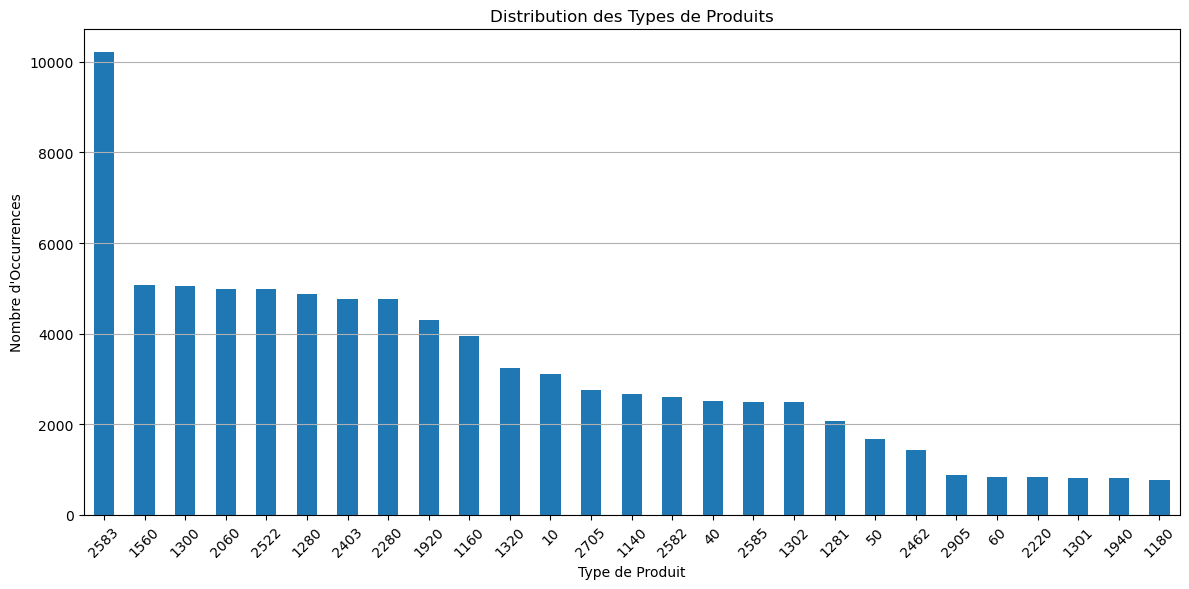

In [7]:
# Créer l'histogramme
plt.figure(figsize=(12, 6))
type_counts.plot(kind='bar')
plt.title('Distribution des Types de Produits')
plt.xlabel('Type de Produit')
plt.ylabel('Nombre d\'Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Afficher le graphique
plt.tight_layout()
plt.show()

Regardons de plus près à quoi correspond les produits de type 2583 :

In [8]:
# Réinitialiser l'index pour créer une colonne d'index
X_train.reset_index(drop=False, inplace=True)
Y_train.reset_index(drop=False, inplace=True)

In [9]:
# Joindre les DataFrames sur l'index
merged_df = pd.merge(X_train, Y_train, left_on='index', right_on='index')

# Filtrer pour obtenir les lignes correspondant au type de produit 2583
produit_2583 = merged_df[merged_df['prdtypecode'] == 2583]

# Afficher les résultats
produit_2583.head(10)

,index,designation,description,productid,imageid,nom_image,image_existe,prdtypecode
20,20,Kit de désinfection pour piscines enfants 20990,NaN,3936362802,1268740880,image_1268740880_product_3936362802.jpg,True,2583
39,39,Bouée gonflable River tube - OOGARDEN,Bouée gonflable River tube en PVC idéale pour ...,3147314797,1225887302,image_1225887302_product_3147314797.jpg,True,2583
53,53,Testeur électronique de pH,Utilisation du Testeur électronique de pHGrâce...,207151480,941622055,image_941622055_product_207151480.jpg,True,2583
58,58,Pompe de filtration Speck Badu 95,NaN,4128438373,1295960377,image_1295960377_product_4128438373.jpg,True,2583
64,64,AstralCom 1 CV Mono de DAB - Surpresseur piscine,Tension (V) : Monophasé - 230 V Puissance : 1...,1857269337,1105831362,image_1105831362_product_1857269337.jpg,True,2583
65,65,Lot de 8 préfiltres jetables pour panier de sk...,Lots de 8 pré-filtres jetables de la marque Ma...,2534214666,1190251480,image_1190251480_product_2534214666.jpg,True,2583
70,70,Piscine gonflable de pulvérisation Forme Tortu...,<p>Cette merveilleuse piscine de pulvérisation...,3929890128,1265209491,image_1265209491_product_3929890128.jpg,True,2583
84,84,Bâche hiver pour piscine Toledo - 280 gr/m² - ...,<p>Bâche hiver pour piscine Toledo - 280 g/m² ...,1158987675,1065997226,image_1065997226_product_1158987675.jpg,True,2583
90,90,Idrasoft 5600 SXT - 30 L de marque Idrania - C...,Idrasoft 5600 SXT - 30 L de Idrania - Adouciss...,2050109964,1123155510,image_1123155510_product_2050109964.jpg,True,2583
91,91,Bâche de piscine bleue rectangulaire en PE 450...,Cette bâche solaire de piscine repose directem...,3855161611,1253151856,image_1253151856_product_3855161611.jpg,True,2583


On remarque que le type 2583 correspond à des produits en rapport avec la piscine.

<h4><font size=4> 1.3.3. Distribution des valeurs manquantes selon le type de produits
    <a name="Distribution_Manquantes_Produits"></a></h4>

In [10]:
merged_df_null = merged_df[merged_df['description'].isnull()]

# Compter le nombre d'occurrences de chaque type de produit
type_counts_null = merged_df_null['prdtypecode'].value_counts()

print(f"Nombre de types de produits : {len(type_counts_null)}\n")
print(type_counts_null)

Nombre de types de produits : 26

prdtypecode
2403    4648
2280    4440
1160    3604
10      2778
1140    1726
40      1642
2462    1368
2522    1189
1300    1173
1320    1101
1280    1068
2705    1025
2583     903
1180     611
1281     492
50       476
2060     286
1302     277
1920     207
2585     198
1560     177
60       133
1301     105
2220      66
2582      62
1940      45
Name: count, dtype: int64


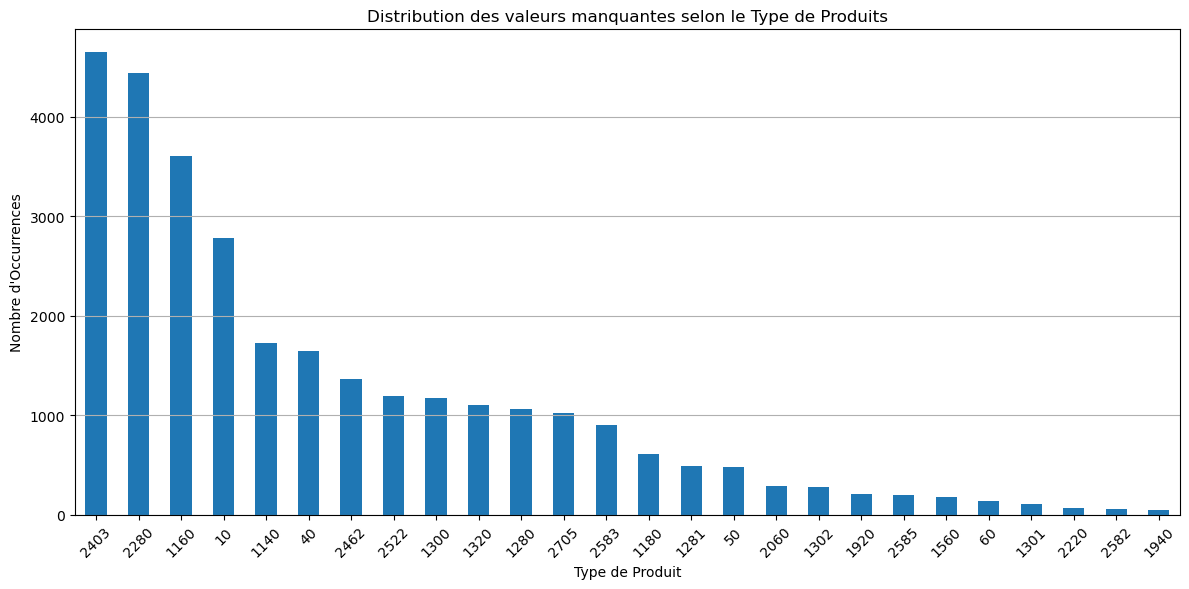

In [11]:
# Créer l'histogramme
plt.figure(figsize=(12, 6))
type_counts_null.plot(kind='bar')
plt.title('Distribution des valeurs manquantes selon le Type de Produits')
plt.xlabel('Type de Produit')
plt.ylabel('Nombre d\'Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Afficher le graphique
plt.tight_layout()
plt.show()

Nous apprenons clairement quelque chose :
- le type 2403 a quasiment tous ses elements sans descriptions 4648/4774

Mais regardons de plus près le pourcentage manquant de chaque produit

In [15]:
# Calculer le nombre total de produits pour chaque type de produit
nombre_total_produits = merged_df.groupby('prdtypecode')['description'].count()

# Calculer le nombre de descriptions manquantes pour chaque type de produit
nombre_manquant = merged_df.groupby('prdtypecode')['description'].apply(lambda x: x.isnull().sum())

# Calculer le pourcentage de descriptions manquantes
pourcentage_manquant = (nombre_manquant / (nombre_total_produits + nombre_manquant)) * 100

# Convertir en DataFrame
resultat_df = pd.DataFrame({
    'nombre_total_produits_no_null': nombre_total_produits.values,
    'pourcentage_manquant': pourcentage_manquant.round(2)
})

resultat_df = resultat_df.reset_index()
resultat_df = pd.merge(resultat_df, type_counts, on='prdtypecode', how='left')

# Afficher le DataFrame final
resultat_df.sort_values(by='pourcentage_manquant', ascending=False)

,prdtypecode,nombre_total_produits_no_null,pourcentage_manquant,count
19,2403,126,97.36,4774
20,2462,53,96.27,1421
18,2280,320,93.28,4760
5,1160,349,91.17,3953
0,10,338,89.15,3116
6,1180,153,79.97,764
1,40,866,65.47,2508
4,1140,945,64.62,2671
25,2705,1736,37.12,2761
12,1320,2140,33.97,3241


Que la description soit manquante ou non, nous indique clairement quelque chose. Il serait judicieux de ne pas supprimer ces données par la suite. Une idée serait de rendre cette information binaire : 0 si il n'y pas de description, 1 sinon.

# idée de graphiques

- 